In [1]:
!python3.8 --version

Python 3.8.16


In [2]:
import pandas

from utils import calculate_percent_replicating_Target,calculate_percent_matching_Target, calculate_percent_replicating_across_plates_Target
from utils import plot_simple_comparison, plot_two_comparisons
from utils import enforce_modality_match_order, enforce_timepoint_order, enforce_timepoint_order_in_plot, enforce_modality_match_order_in_plot

In [3]:
variable = 'Target1 vs Target2'
variable_to_save = variable.replace(' ','_')

experiment_dict = {
    'Target1':['BR00117010','BR00117011','BR00117012','BR00117013'],
    'Target2':['BR00121434','BR00121435','BR00121440']
    }



In [4]:
plate_df = pandas.DataFrame()

for eachmap in list(experiment_dict.keys()):
    if eachmap == 'Target1':
        plate_df = plate_df.append({'Plate Name List' : experiment_dict[eachmap], 
        'Batch' : 'CP-JUMP1', variable : eachmap, 'Percent Replicating' : calculate_percent_replicating_Target(
        '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1',experiment_dict[eachmap],
            n_replicates=4)}, ignore_index=True)
    else:
        plate_df = plate_df.append({'Plate Name List' : experiment_dict[eachmap], 
        'Batch' : 'Target2', variable : eachmap, 'Percent Replicating' : calculate_percent_replicating_Target(
        '../profiles-pilots/profiles/2021_04_20_Target2',experiment_dict[eachmap],
            n_replicates=3)}, ignore_index=True)

/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31223/2855349940.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plate_df = plate_df.append({'Plate Name List' : experiment_dict[eachmap],
/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31223/2855349940.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plate_df = plate_df.append({'Plate Name List' : experiment_dict[eachmap],


Saved to ../figures/Target1 vs Target2-Percent Replicating-Batch-None-None.svg


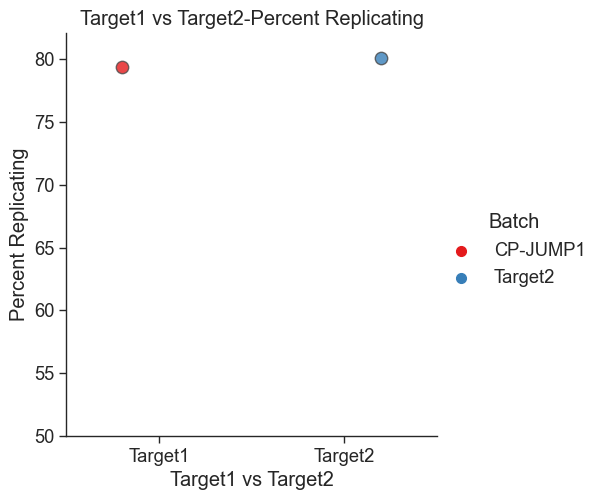

In [5]:
plot_simple_comparison(df=plate_df,x=variable,y='Percent Replicating',hue='Batch')

In [6]:
plate_df.to_csv(f'checkpoint_csvs/{variable_to_save}-replicating.csv',index=False)

In [7]:
plate_match_df = pandas.DataFrame()

plate_match_df = plate_match_df.append({'Percent Matching' : calculate_percent_matching_Target(
    '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1',
    experiment_dict['Target1'],'Compounds', 
    '../profiles-pilots/profiles/2021_04_20_Target2',
    experiment_dict['Target2'],'Compounds'),
    'Modality Match' : 'Compounds - Compounds',
    variable:'Target1 - Target2'},ignore_index=True)

/Users/bcimini/Documents/GitHub/carpenterlab/2022_Cimini_NatureProtocols/notebooks/utils.py:559: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df_1['Metadata_modality'] = modality_1
/Users/bcimini/Documents/GitHub/carpenterlab/2022_Cimini_NatureProtocols/notebooks/utils.py:575: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_df_2['Metadata_modality'] = modality_2
/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31223/1068803544.py:3: FutureWarning: The frame.append method is deprecated and will be removed from 

In [8]:
print(plate_match_df['Percent Matching'])
plate_match_df.to_csv(f'checkpoint_csvs/{variable_to_save}-matching.csv',index=False)

0    38.884586
Name: Percent Matching, dtype: float64


In [9]:
plate_to_plate_replicating_df = pandas.DataFrame()

comparison_list = []

for eachmap1 in list(experiment_dict.keys()):
    if eachmap1 == 'Target1':
        batchpath1 = '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1'
    else:
        batchpath1 = '../profiles-pilots/profiles/2021_04_20_Target2'
    for eachmap2 in list(experiment_dict.keys()):
        if eachmap2 == 'Target1':
            batchpath2 = '../profiles-cp-jump1/profiles/2020_11_04_CPJUMP1'
        else:
            batchpath2 = '../profiles-pilots/profiles/2021_04_20_Target2'
        for eachplate1 in experiment_dict[eachmap1]:
            for eachplate2 in experiment_dict[eachmap2]:
                string1 = f"{eachmap1}-{eachplate1}"
                string2 = f"{eachmap2}-{eachplate2}"
                if string1 != string2:
                    if f"{string1}-{string2}" not in comparison_list:
                        if f"{string2}-{string1}" not in comparison_list:
                            comparison_list.append(f"{string1}-{string2}")
                            ordered_map_list = [eachmap1,eachmap2]
                            ordered_map_list.sort()
                            ordered_plate_list = [eachplate1,eachplate2]
                            ordered_plate_list.sort()                           
                            plate_to_plate_replicating_df = plate_to_plate_replicating_df.append({
                                'Percent Replicating' : calculate_percent_replicating_across_plates_Target(
                                batchpath1, eachplate1, batchpath2, eachplate2),
                                variable:f"{ordered_map_list[0]} - {ordered_map_list[1]}",
                                'Plate Comparison':f"{ordered_plate_list[0]} - {ordered_plate_list[1]}"}, ignore_index=True)

/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31223/1498561381.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plate_to_plate_replicating_df = plate_to_plate_replicating_df.append({
/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31223/1498561381.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plate_to_plate_replicating_df = plate_to_plate_replicating_df.append({
/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31223/1498561381.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  plate_to_plate_replicating_df = plate_to_plate_replicating_df.append({
/var/folders/8t/hj0jrcld7sjbfvg6svqpwggr0000gq/T/ipykernel_31223/1498561381.py:27: FutureWarning: The frame.append method is deprecat

BRD-K36574127-001-01-3 1.0
BRD-K74913225-001-14-0 1.0
BRD-K94342292-001-01-3 1.0
BRD-K19975102-001-01-2 1.0
BRD-K25244359-066-02-6 1.0
BRD-A85242401-001-11-5 1.0
BRD-K06426971-001-02-7 1.0
BRD-K50199947-001-03-4 1.0
BRD-K50720187-051-03-1 1.0
BRD-K61845293-300-01-9 1.0
BRD-K87782578-001-01-4 1.0
BRD-K26439554-001-01-3 1.0
BRD-K29151923-001-01-5 1.0
BRD-K66788707-001-14-3 1.0
BRD-K06890060-001-09-1 1.0
BRD-K87632963-001-03-0 1.0
BRD-K37602296-001-01-6 1.0
BRD-K09143580-001-01-0 1.0
BRD-A22713669-001-04-3 1.0
BRD-K16472653-001-01-6 1.0
BRD-K34581968-001-05-3 1.0
BRD-K73276278-305-01-1 1.0
BRD-A43005764-003-01-5 1.0
BRD-K09787262-001-02-7 1.0
BRD-K87158025-003-08-7 1.0
BRD-A54139254-001-09-2 1.0
BRD-K44432556-001-05-5 1.0
BRD-K36740062-001-06-6 1.0
BRD-K27539181-001-08-5 1.0
BRD-K51265828-001-01-0 1.0
BRD-K90497590-001-05-9 1.0
BRD-K69877120-001-01-7 1.0
BRD-K90747162-001-01-4 1.0
BRD-A65597028-003-08-1 1.0
BRD-K24282351-001-01-4 1.0
BRD-K44227013-001-08-0 1.0
BRD-K59058747-001-19-1 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K73319509-001-08-0 1.0
BRD-K75748943-300-01-3 1.0
BRD-K15179513-001-04-2 1.0
BRD-K36927236-001-36-7 1.0
BRD-K31170746-001-01-6 1.0
BRD-K57708067-001-01-3 1.0
BRD-K64054020-001-02-7 1.0
BRD-K54330070-001-19-6 1.0
BRD-K03155172-001-03-0 1.0
BRD-K07442505-001-03-6 1.0
BRD-K26514105-001-01-7 1.0
BRD-K32821942-001-22-1 1.0
BRD-K68164687-001-01-6 1.0
BRD-K42352790-001-05-3 1.0
BRD-K60476892-001-16-1 1.0
BRD-K24283677-001-01-9 1.0
BRD-K03109492-001-02-2 1.0
BRD-K80666802-003-01-0 1.0
BRD-K10670311-001-17-1 1.0
BRD-A30815329-001-12-1 1.0
BRD-K50836978-001-03-3 1.0
BRD-K77220725-003-01-5 1.0
BRD-A89164055-001-03-3 1.0
BRD-K89517477-001-01-4 1.0
BRD-K70463136-001-01-5 1.0
BRD-K16444452-001-09-1 1.0
BRD-K61688984-001-02-9 1.0
BRD-K16803204-001-01-6 1.0
BRD-A74391928-051-03-9 1.0
BRD-K82818427-001-04-8 1.0
BRD-K83896451-001-06-7 1.0
BRD-K15819326-001-01-6 1.0
BRD-K52960356-001-13-0 1.0
BRD-K76908866-001-07-6 1.0
BRD-A18763547-300-06-3 1.0
BRD-K09338665-001-08-9 1.0
BRD-K19477839-001-07-6 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K36574127-001-01-3 1.0
BRD-K74913225-001-14-0 1.0
BRD-K94342292-001-01-3 1.0
BRD-K19975102-001-01-2 1.0
BRD-K25244359-066-02-6 1.0
BRD-A85242401-001-11-5 1.0
BRD-K06426971-001-02-7 1.0
BRD-K50199947-001-03-4 1.0
BRD-K50720187-051-03-1 1.0
BRD-K61845293-300-01-9 1.0
BRD-K87782578-001-01-4 1.0
BRD-K26439554-001-01-3 1.0
BRD-K29151923-001-01-5 1.0
BRD-K66788707-001-14-3 1.0
BRD-K06890060-001-09-1 1.0
BRD-K87632963-001-03-0 1.0
BRD-K37602296-001-01-6 1.0
BRD-K09143580-001-01-0 1.0
BRD-A22713669-001-04-3 1.0
BRD-K16472653-001-01-6 1.0
BRD-K34581968-001-05-3 1.0
BRD-K73276278-305-01-1 1.0
BRD-A43005764-003-01-5 1.0
BRD-K09787262-001-02-7 1.0
BRD-K87158025-003-08-7 1.0
BRD-A54139254-001-09-2 1.0
BRD-K44432556-001-05-5 1.0
BRD-K36740062-001-06-6 1.0
BRD-K27539181-001-08-5 1.0
BRD-K51265828-001-01-0 1.0
BRD-K90497590-001-05-9 1.0
BRD-K69877120-001-01-7 1.0
BRD-K90747162-001-01-4 1.0
BRD-A65597028-003-08-1 1.0
BRD-K24282351-001-01-4 1.0
BRD-K44227013-001-08-0 1.0
BRD-K59058747-001-19-1 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K64054020-001-02-7 1.0
BRD-K54330070-001-19-6 1.0
BRD-K03155172-001-03-0 1.0
BRD-K07442505-001-03-6 1.0
BRD-K26514105-001-01-7 1.0
BRD-K32821942-001-22-1 1.0
BRD-K68164687-001-01-6 1.0


/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K42352790-001-05-3 1.0
BRD-K60476892-001-16-1 1.0
BRD-K24283677-001-01-9 1.0
BRD-K03109492-001-02-2 1.0
BRD-K80666802-003-01-0 1.0
BRD-K10670311-001-17-1 1.0
BRD-A30815329-001-12-1 1.0
BRD-K50836978-001-03-3 1.0
BRD-K77220725-003-01-5 1.0
BRD-A89164055-001-03-3 1.0
BRD-K89517477-001-01-4 1.0
BRD-K70463136-001-01-5 1.0
BRD-K16444452-001-09-1 1.0
BRD-K61688984-001-02-9 1.0
BRD-K16803204-001-01-6 1.0


/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


BRD-A74391928-051-03-9 1.0
BRD-K82818427-001-04-8 1.0
BRD-K83896451-001-06-7 1.0
BRD-K15819326-001-01-6 1.0
BRD-K52960356-001-13-0 1.0
BRD-K76908866-001-07-6 1.0
BRD-A18763547-300-06-3 1.0
BRD-K09338665-001-08-9 1.0
BRD-K19477839-001-07-6 1.0
BRD-K03601870-001-01-2 1.0
BRD-K07762753-001-05-1 1.0
BRD-K53972329-001-01-3 1.0
BRD-A51831848-001-01-7 1.0
BRD-K13094524-001-04-2 1.0
BRD-K36055864-001-20-0 1.0
BRD-K56740996-001-02-1 1.0
BRD-K45293975-001-02-0 1.0
BRD-K86930074-001-05-0 1.0
BRD-A31564021-001-02-6 1.0
BRD-K08893438-001-06-4 1.0
BRD-K93788137-001-04-1 1.0
BRD-K14560436-001-01-4 1.0
BRD-K44067360-001-29-5 1.0
BRD-K47557313-001-02-7 1.0
BRD-K67637637-003-11-8 1.0
BRD-K20897876-001-11-8 1.0
BRD-K72063794-003-01-0 1.0
BRD-K30177383-001-01-0 1.0
BRD-K93779381-001-01-9 1.0
BRD-K81197548-003-01-4 1.0
BRD-K52075715-001-06-7 1.0
BRD-K12502280-001-11-4 1.0
BRD-K51485109-001-01-4 1.0
BRD-K11558771-001-13-9 1.0
BRD-K22149900-001-06-2 1.0
BRD-K76674262-001-03-3 1.0
BRD-K61397605-001-01-8 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K36574127-001-01-3 1.0
BRD-K74913225-001-14-0 1.0
BRD-K94342292-001-01-3 1.0
BRD-K19975102-001-01-2 1.0
BRD-K25244359-066-02-6 1.0
BRD-A85242401-001-11-5 1.0
BRD-K06426971-001-02-7 1.0
BRD-K50199947-001-03-4 1.0
BRD-K50720187-051-03-1 1.0
BRD-K61845293-300-01-9 1.0
BRD-K87782578-001-01-4 1.0
BRD-K26439554-001-01-3 1.0
BRD-K29151923-001-01-5 1.0
BRD-K66788707-001-14-3 1.0
BRD-K06890060-001-09-1 1.0
BRD-K87632963-001-03-0 1.0
BRD-K37602296-001-01-6 1.0
BRD-K09143580-001-01-0 1.0
BRD-A22713669-001-04-3 1.0
BRD-K16472653-001-01-6 1.0
BRD-K34581968-001-05-3 1.0
BRD-K73276278-305-01-1 1.0
BRD-A43005764-003-01-5 1.0
BRD-K09787262-001-02-7 1.0
BRD-K87158025-003-08-7 1.0
BRD-A54139254-001-09-2 1.0
BRD-K44432556-001-05-5 1.0
BRD-K36740062-001-06-6 1.0
BRD-K27539181-001-08-5 1.0
BRD-K51265828-001-01-0 1.0
BRD-K90497590-001-05-9 1.0
BRD-K69877120-001-01-7 1.0
BRD-K90747162-001-01-4 1.0
BRD-A65597028-003-08-1 1.0
BRD-K24282351-001-01-4 1.0
BRD-K44227013-001-08-0 1.0
BRD-K59058747-001-19-1 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K54330070-001-19-6 1.0
BRD-K03155172-001-03-0 1.0
BRD-K07442505-001-03-6 1.0
BRD-K26514105-001-01-7 1.0
BRD-K32821942-001-22-1 1.0
BRD-K68164687-001-01-6 1.0
BRD-K42352790-001-05-3 1.0


/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


BRD-K60476892-001-16-1 1.0
BRD-K24283677-001-01-9 1.0
BRD-K03109492-001-02-2 1.0
BRD-K80666802-003-01-0 1.0
BRD-K10670311-001-17-1 1.0
BRD-A30815329-001-12-1 1.0
BRD-K50836978-001-03-3 1.0
BRD-K77220725-003-01-5 1.0
BRD-A89164055-001-03-3 1.0
BRD-K89517477-001-01-4 1.0
BRD-K70463136-001-01-5 1.0
BRD-K16444452-001-09-1 1.0
BRD-K61688984-001-02-9 1.0


/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


BRD-K16803204-001-01-6 1.0
BRD-A74391928-051-03-9 1.0
BRD-K82818427-001-04-8 1.0
BRD-K83896451-001-06-7 1.0
BRD-K15819326-001-01-6 1.0
BRD-K52960356-001-13-0 1.0
BRD-K76908866-001-07-6 1.0
BRD-A18763547-300-06-3 1.0
BRD-K09338665-001-08-9 1.0
BRD-K19477839-001-07-6 1.0
BRD-K03601870-001-01-2 1.0
BRD-K07762753-001-05-1 1.0
BRD-K53972329-001-01-3 1.0
BRD-A51831848-001-01-7 1.0
BRD-K13094524-001-04-2 1.0
BRD-K36055864-001-20-0 1.0
BRD-K56740996-001-02-1 1.0
BRD-K45293975-001-02-0 1.0
BRD-K86930074-001-05-0 1.0
BRD-A31564021-001-02-6 1.0
BRD-K08893438-001-06-4 1.0
BRD-K93788137-001-04-1 1.0
BRD-K14560436-001-01-4 1.0
BRD-K44067360-001-29-5 1.0
BRD-K47557313-001-02-7 1.0
BRD-K67637637-003-11-8 1.0
BRD-K20897876-001-11-8 1.0
BRD-K72063794-003-01-0 1.0
BRD-K30177383-001-01-0 1.0
BRD-K93779381-001-01-9 1.0
BRD-K81197548-003-01-4 1.0
BRD-K52075715-001-06-7 1.0
BRD-K12502280-001-11-4 1.0
BRD-K51485109-001-01-4 1.0
BRD-K11558771-001-13-9 1.0
BRD-K22149900-001-06-2 1.0
BRD-K76674262-001-03-3 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K36574127-001-01-3 1.0
BRD-K74913225-001-14-0 1.0
BRD-K94342292-001-01-3 1.0
BRD-K19975102-001-01-2 1.0
BRD-K25244359-066-02-6 1.0
BRD-A85242401-001-11-5 1.0
BRD-K06426971-001-02-7 1.0
BRD-K50199947-001-03-4 1.0
BRD-K50720187-051-03-1 1.0
BRD-K61845293-300-01-9 1.0
BRD-K87782578-001-01-4 1.0
BRD-K26439554-001-01-3 1.0
BRD-K29151923-001-01-5 1.0
BRD-K66788707-001-14-3 1.0
BRD-K06890060-001-09-1 1.0
BRD-K87632963-001-03-0 1.0
BRD-K37602296-001-01-6 1.0
BRD-K09143580-001-01-0 1.0
BRD-A22713669-001-04-3 1.0
BRD-K16472653-001-01-6 1.0
BRD-K34581968-001-05-3 1.0
BRD-K73276278-305-01-1 1.0
BRD-A43005764-003-01-5 1.0
BRD-K09787262-001-02-7 1.0
BRD-K87158025-003-08-7 1.0
BRD-A54139254-001-09-2 1.0
BRD-K44432556-001-05-5 1.0
BRD-K36740062-001-06-6 1.0
BRD-K27539181-001-08-5 1.0
BRD-K51265828-001-01-0 1.0
BRD-K90497590-001-05-9 1.0
BRD-K69877120-001-01-7 1.0
BRD-K90747162-001-01-4 1.0
BRD-A65597028-003-08-1 1.0
BRD-K24282351-001-01-4 1.0
BRD-K44227013-001-08-0 1.0
BRD-K59058747-001-19-1 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K26514105-001-01-7 1.0
BRD-K32821942-001-22-1 1.0
BRD-K68164687-001-01-6 1.0
BRD-K42352790-001-05-3 1.0
BRD-K60476892-001-16-1 1.0
BRD-K24283677-001-01-9 1.0
BRD-K03109492-001-02-2 1.0
BRD-K80666802-003-01-0 1.0


/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K10670311-001-17-1 1.0
BRD-A30815329-001-12-1 1.0
BRD-K50836978-001-03-3 1.0
BRD-K77220725-003-01-5 1.0
BRD-A89164055-001-03-3 1.0
BRD-K89517477-001-01-4 1.0
BRD-K70463136-001-01-5 1.0
BRD-K16444452-001-09-1 1.0
BRD-K61688984-001-02-9 1.0
BRD-K16803204-001-01-6 1.0
BRD-A74391928-051-03-9 1.0
BRD-K82818427-001-04-8 1.0
BRD-K83896451-001-06-7 1.0


/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


BRD-K15819326-001-01-6 1.0
BRD-K52960356-001-13-0 1.0
BRD-K76908866-001-07-6 1.0
BRD-A18763547-300-06-3 1.0
BRD-K09338665-001-08-9 1.0
BRD-K19477839-001-07-6 1.0
BRD-K03601870-001-01-2 1.0
BRD-K07762753-001-05-1 1.0
BRD-K53972329-001-01-3 1.0
BRD-A51831848-001-01-7 1.0
BRD-K13094524-001-04-2 1.0
BRD-K36055864-001-20-0 1.0
BRD-K56740996-001-02-1 1.0
BRD-K45293975-001-02-0 1.0
BRD-K86930074-001-05-0 1.0
BRD-A31564021-001-02-6 1.0
BRD-K08893438-001-06-4 1.0
BRD-K93788137-001-04-1 1.0
BRD-K14560436-001-01-4 1.0
BRD-K44067360-001-29-5 1.0
BRD-K47557313-001-02-7 1.0
BRD-K67637637-003-11-8 1.0
BRD-K20897876-001-11-8 1.0
BRD-K72063794-003-01-0 1.0
BRD-K30177383-001-01-0 1.0
BRD-K93779381-001-01-9 1.0
BRD-K81197548-003-01-4 1.0
BRD-K52075715-001-06-7 1.0
BRD-K12502280-001-11-4 1.0
BRD-K51485109-001-01-4 1.0
BRD-K11558771-001-13-9 1.0
BRD-K22149900-001-06-2 1.0
BRD-K76674262-001-03-3 1.0
BRD-K61397605-001-01-8 1.0
BRD-K22134346-001-22-3 1.0
BRD-K16542329-001-16-8 1.0
BRD-K11796549-001-05-2 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K36574127-001-01-3 1.0
BRD-K74913225-001-14-0 1.0
BRD-K94342292-001-01-3 1.0
BRD-K19975102-001-01-2 1.0
BRD-K25244359-066-02-6 1.0
BRD-A85242401-001-11-5 1.0
BRD-K06426971-001-02-7 1.0
BRD-K50199947-001-03-4 1.0
BRD-K50720187-051-03-1 1.0
BRD-K61845293-300-01-9 1.0
BRD-K87782578-001-01-4 1.0
BRD-K26439554-001-01-3 1.0
BRD-K29151923-001-01-5 1.0
BRD-K66788707-001-14-3 1.0
BRD-K06890060-001-09-1 1.0
BRD-K87632963-001-03-0 1.0
BRD-K37602296-001-01-6 1.0
BRD-K09143580-001-01-0 1.0
BRD-A22713669-001-04-3 1.0
BRD-K16472653-001-01-6 1.0
BRD-K34581968-001-05-3 1.0
BRD-K73276278-305-01-1 1.0
BRD-A43005764-003-01-5 1.0
BRD-K09787262-001-02-7 1.0
BRD-K87158025-003-08-7 1.0
BRD-A54139254-001-09-2 1.0
BRD-K44432556-001-05-5 1.0
BRD-K36740062-001-06-6 1.0
BRD-K27539181-001-08-5 1.0
BRD-K51265828-001-01-0 1.0
BRD-K90497590-001-05-9 1.0
BRD-K69877120-001-01-7 1.0
BRD-K90747162-001-01-4 1.0
BRD-A65597028-003-08-1 1.0
BRD-K24282351-001-01-4 1.0
BRD-K44227013-001-08-0 1.0
BRD-K59058747-001-19-1 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K68164687-001-01-6 1.0
BRD-K42352790-001-05-3 1.0
BRD-K60476892-001-16-1 1.0
BRD-K24283677-001-01-9 1.0
BRD-K03109492-001-02-2 1.0
BRD-K80666802-003-01-0 1.0
BRD-K10670311-001-17-1 1.0
BRD-A30815329-001-12-1 1.0
BRD-K50836978-001-03-3 1.0
BRD-K77220725-003-01-5 1.0
BRD-A89164055-001-03-3 1.0
BRD-K89517477-001-01-4 1.0
BRD-K70463136-001-01-5 1.0
BRD-K16444452-001-09-1 1.0
BRD-K61688984-001-02-9 1.0
BRD-K16803204-001-01-6 1.0
BRD-A74391928-051-03-9 1.0
BRD-K82818427-001-04-8 1.0
BRD-K83896451-001-06-7 1.0


/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K15819326-001-01-6 1.0
BRD-K52960356-001-13-0 1.0
BRD-K76908866-001-07-6 1.0
BRD-A18763547-300-06-3 1.0
BRD-K09338665-001-08-9 1.0
BRD-K19477839-001-07-6 1.0
BRD-K03601870-001-01-2 1.0
BRD-K07762753-001-05-1 1.0
BRD-K53972329-001-01-3 1.0
BRD-A51831848-001-01-7 1.0
BRD-K13094524-001-04-2 1.0
BRD-K36055864-001-20-0 1.0
BRD-K56740996-001-02-1 1.0
BRD-K45293975-001-02-0 1.0
BRD-K86930074-001-05-0 1.0
BRD-A31564021-001-02-6 1.0
BRD-K08893438-001-06-4 1.0
BRD-K93788137-001-04-1 1.0
BRD-K14560436-001-01-4 1.0
BRD-K44067360-001-29-5 1.0
BRD-K47557313-001-02-7 1.0
BRD-K67637637-003-11-8 1.0
BRD-K20897876-001-11-8 1.0
BRD-K72063794-003-01-0 1.0
BRD-K30177383-001-01-0 1.0
BRD-K93779381-001-01-9 1.0
BRD-K81197548-003-01-4 1.0
BRD-K52075715-001-06-7 1.0
BRD-K12502280-001-11-4 1.0
BRD-K51485109-001-01-4 1.0
BRD-K11558771-001-13-9 1.0
BRD-K22149900-001-06-2 1.0
BRD-K76674262-001-03-3 1.0
BRD-K61397605-001-01-8 1.0
BRD-K22134346-001-22-3 1.0
BRD-K16542329-001-16-8 1.0
BRD-K11796549-001-05-2 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K36574127-001-01-3 1.0
BRD-K74913225-001-14-0 1.0
BRD-K94342292-001-01-3 1.0
BRD-K19975102-001-01-2 1.0
BRD-K25244359-066-02-6 1.0
BRD-A85242401-001-11-5 1.0
BRD-K06426971-001-02-7 1.0
BRD-K50199947-001-03-4 1.0
BRD-K50720187-051-03-1 1.0
BRD-K61845293-300-01-9 1.0
BRD-K87782578-001-01-4 1.0
BRD-K26439554-001-01-3 1.0
BRD-K29151923-001-01-5 1.0
BRD-K66788707-001-14-3 1.0
BRD-K06890060-001-09-1 1.0
BRD-K87632963-001-03-0 1.0
BRD-K37602296-001-01-6 1.0
BRD-K09143580-001-01-0 1.0
BRD-A22713669-001-04-3 1.0
BRD-K16472653-001-01-6 1.0
BRD-K34581968-001-05-3 1.0
BRD-K73276278-305-01-1 1.0
BRD-A43005764-003-01-5 1.0
BRD-K09787262-001-02-7 1.0
BRD-K87158025-003-08-7 1.0
BRD-A54139254-001-09-2 1.0
BRD-K44432556-001-05-5 1.0
BRD-K36740062-001-06-6 1.0
BRD-K27539181-001-08-5 1.0
BRD-K51265828-001-01-0 1.0
BRD-K90497590-001-05-9 1.0
BRD-K69877120-001-01-7 1.0
BRD-K90747162-001-01-4 1.0
BRD-A65597028-003-08-1 1.0
BRD-K24282351-001-01-4 1.0
BRD-K44227013-001-08-0 1.0
BRD-K59058747-001-19-1 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K64054020-001-02-7 1.0
BRD-K54330070-001-19-6 1.0
BRD-K03155172-001-03-0 1.0
BRD-K07442505-001-03-6 1.0
BRD-K26514105-001-01-7 1.0
BRD-K32821942-001-22-1 1.0
BRD-K68164687-001-01-6 1.0
BRD-K42352790-001-05-3 1.0


/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K60476892-001-16-1 1.0
BRD-K24283677-001-01-9 1.0
BRD-K03109492-001-02-2 1.0
BRD-K80666802-003-01-0 1.0
BRD-K10670311-001-17-1 1.0
BRD-A30815329-001-12-1 1.0
BRD-K50836978-001-03-3 1.0
BRD-K77220725-003-01-5 1.0
BRD-A89164055-001-03-3 1.0
BRD-K89517477-001-01-4 1.0
BRD-K70463136-001-01-5 1.0
BRD-K16444452-001-09-1 1.0
BRD-K61688984-001-02-9 1.0
BRD-K16803204-001-01-6 1.0
BRD-A74391928-051-03-9 1.0
BRD-K82818427-001-04-8 1.0
BRD-K83896451-001-06-7 1.0
BRD-K15819326-001-01-6 1.0
BRD-K52960356-001-13-0 1.0
BRD-K76908866-001-07-6 1.0
BRD-A18763547-300-06-3 1.0
BRD-K09338665-001-08-9 1.0
BRD-K19477839-001-07-6 1.0
BRD-K03601870-001-01-2 1.0
BRD-K07762753-001-05-1 1.0
BRD-K53972329-001-01-3 1.0
BRD-A51831848-001-01-7 1.0
BRD-K13094524-001-04-2 1.0
BRD-K36055864-001-20-0 1.0
BRD-K56740996-001-02-1 1.0
BRD-K45293975-001-02-0 1.0
BRD-K86930074-001-05-0 1.0
BRD-A31564021-001-02-6 1.0
BRD-K08893438-001-06-4 1.0
BRD-K93788137-001-04-1 1.0
BRD-K14560436-001-01-4 1.0
BRD-K44067360-001-29-5 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K36574127-001-01-3 1.0
BRD-K74913225-001-14-0 1.0
BRD-K94342292-001-01-3 1.0
BRD-K19975102-001-01-2 1.0
BRD-K25244359-066-02-6 1.0
BRD-A85242401-001-11-5 1.0
BRD-K06426971-001-02-7 1.0
BRD-K50199947-001-03-4 1.0
BRD-K50720187-051-03-1 1.0
BRD-K61845293-300-01-9 1.0
BRD-K87782578-001-01-4 1.0
BRD-K26439554-001-01-3 1.0
BRD-K29151923-001-01-5 1.0
BRD-K66788707-001-14-3 1.0
BRD-K06890060-001-09-1 1.0
BRD-K87632963-001-03-0 1.0
BRD-K37602296-001-01-6 1.0
BRD-K09143580-001-01-0 1.0
BRD-A22713669-001-04-3 1.0
BRD-K16472653-001-01-6 1.0
BRD-K34581968-001-05-3 1.0
BRD-K73276278-305-01-1 1.0
BRD-A43005764-003-01-5 1.0
BRD-K09787262-001-02-7 1.0
BRD-K87158025-003-08-7 1.0
BRD-A54139254-001-09-2 1.0
BRD-K44432556-001-05-5 1.0
BRD-K36740062-001-06-6 1.0
BRD-K27539181-001-08-5 1.0
BRD-K51265828-001-01-0 1.0
BRD-K90497590-001-05-9 1.0
BRD-K69877120-001-01-7 1.0
BRD-K90747162-001-01-4 1.0
BRD-A65597028-003-08-1 1.0
BRD-K24282351-001-01-4 1.0
BRD-K44227013-001-08-0 1.0
BRD-K59058747-001-19-1 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K54330070-001-19-6 1.0
BRD-K03155172-001-03-0 1.0
BRD-K07442505-001-03-6 1.0
BRD-K26514105-001-01-7 1.0
BRD-K32821942-001-22-1 1.0
BRD-K68164687-001-01-6 1.0
BRD-K42352790-001-05-3 1.0
BRD-K60476892-001-16-1 1.0
BRD-K24283677-001-01-9 1.0
BRD-K03109492-001-02-2 1.0
BRD-K80666802-003-01-0 1.0
BRD-K10670311-001-17-1 1.0
BRD-A30815329-001-12-1 1.0


/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K50836978-001-03-3 1.0
BRD-K77220725-003-01-5 1.0
BRD-A89164055-001-03-3 1.0
BRD-K89517477-001-01-4 1.0
BRD-K70463136-001-01-5 1.0
BRD-K16444452-001-09-1 1.0
BRD-K61688984-001-02-9 1.0
BRD-K16803204-001-01-6 1.0
BRD-A74391928-051-03-9 1.0
BRD-K82818427-001-04-8 1.0
BRD-K83896451-001-06-7 1.0
BRD-K15819326-001-01-6 1.0
BRD-K52960356-001-13-0 1.0
BRD-K76908866-001-07-6 1.0
BRD-A18763547-300-06-3 1.0
BRD-K09338665-001-08-9 1.0
BRD-K19477839-001-07-6 1.0
BRD-K03601870-001-01-2 1.0
BRD-K07762753-001-05-1 1.0
BRD-K53972329-001-01-3 1.0
BRD-A51831848-001-01-7 1.0
BRD-K13094524-001-04-2 1.0
BRD-K36055864-001-20-0 1.0
BRD-K56740996-001-02-1 1.0
BRD-K45293975-001-02-0 1.0
BRD-K86930074-001-05-0 1.0
BRD-A31564021-001-02-6 1.0
BRD-K08893438-001-06-4 1.0
BRD-K93788137-001-04-1 1.0
BRD-K14560436-001-01-4 1.0
BRD-K44067360-001-29-5 1.0
BRD-K47557313-001-02-7 1.0
BRD-K67637637-003-11-8 1.0
BRD-K20897876-001-11-8 1.0
BRD-K72063794-003-01-0 1.0
BRD-K30177383-001-01-0 1.0
BRD-K93779381-001-01-9 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K36574127-001-01-3 1.0
BRD-K74913225-001-14-0 1.0
BRD-K94342292-001-01-3 1.0
BRD-K19975102-001-01-2 1.0
BRD-K25244359-066-02-6 1.0
BRD-A85242401-001-11-5 1.0
BRD-K06426971-001-02-7 1.0
BRD-K50199947-001-03-4 1.0
BRD-K50720187-051-03-1 1.0
BRD-K61845293-300-01-9 1.0
BRD-K87782578-001-01-4 1.0
BRD-K26439554-001-01-3 1.0
BRD-K29151923-001-01-5 1.0
BRD-K66788707-001-14-3 1.0
BRD-K06890060-001-09-1 1.0
BRD-K87632963-001-03-0 1.0
BRD-K37602296-001-01-6 1.0
BRD-K09143580-001-01-0 1.0
BRD-A22713669-001-04-3 1.0
BRD-K16472653-001-01-6 1.0
BRD-K34581968-001-05-3 1.0
BRD-K73276278-305-01-1 1.0
BRD-A43005764-003-01-5 1.0
BRD-K09787262-001-02-7 1.0
BRD-K87158025-003-08-7 1.0
BRD-A54139254-001-09-2 1.0
BRD-K44432556-001-05-5 1.0
BRD-K36740062-001-06-6 1.0
BRD-K27539181-001-08-5 1.0
BRD-K51265828-001-01-0 1.0
BRD-K90497590-001-05-9 1.0
BRD-K69877120-001-01-7 1.0
BRD-K90747162-001-01-4 1.0
BRD-A65597028-003-08-1 1.0
BRD-K24282351-001-01-4 1.0
BRD-K44227013-001-08-0 1.0
BRD-K59058747-001-19-1 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K26514105-001-01-7 1.0
BRD-K32821942-001-22-1 1.0
BRD-K68164687-001-01-6 1.0
BRD-K42352790-001-05-3 1.0
BRD-K60476892-001-16-1 1.0
BRD-K24283677-001-01-9 1.0
BRD-K03109492-001-02-2 1.0
BRD-K80666802-003-01-0 1.0
BRD-K10670311-001-17-1 1.0
BRD-A30815329-001-12-1 1.0
BRD-K50836978-001-03-3 1.0
BRD-K77220725-003-01-5 1.0
BRD-A89164055-001-03-3 1.0
BRD-K89517477-001-01-4 1.0
BRD-K70463136-001-01-5 1.0
BRD-K16444452-001-09-1 1.0


/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K61688984-001-02-9 1.0
BRD-K16803204-001-01-6 1.0
BRD-A74391928-051-03-9 1.0
BRD-K82818427-001-04-8 1.0
BRD-K83896451-001-06-7 1.0
BRD-K15819326-001-01-6 1.0
BRD-K52960356-001-13-0 1.0
BRD-K76908866-001-07-6 1.0
BRD-A18763547-300-06-3 1.0
BRD-K09338665-001-08-9 1.0
BRD-K19477839-001-07-6 1.0
BRD-K03601870-001-01-2 1.0
BRD-K07762753-001-05-1 1.0
BRD-K53972329-001-01-3 1.0
BRD-A51831848-001-01-7 1.0
BRD-K13094524-001-04-2 1.0
BRD-K36055864-001-20-0 1.0
BRD-K56740996-001-02-1 1.0
BRD-K45293975-001-02-0 1.0
BRD-K86930074-001-05-0 1.0
BRD-A31564021-001-02-6 1.0
BRD-K08893438-001-06-4 1.0
BRD-K93788137-001-04-1 1.0
BRD-K14560436-001-01-4 1.0
BRD-K44067360-001-29-5 1.0
BRD-K47557313-001-02-7 1.0
BRD-K67637637-003-11-8 1.0
BRD-K20897876-001-11-8 1.0
BRD-K72063794-003-01-0 1.0
BRD-K30177383-001-01-0 1.0
BRD-K93779381-001-01-9 1.0
BRD-K81197548-003-01-4 1.0
BRD-K52075715-001-06-7 1.0
BRD-K12502280-001-11-4 1.0
BRD-K51485109-001-01-4 1.0
BRD-K11558771-001-13-9 1.0
BRD-K22149900-001-06-2 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K36574127-001-01-3 1.0
BRD-K74913225-001-14-0 1.0
BRD-K94342292-001-01-3 1.0
BRD-K19975102-001-01-2 1.0
BRD-K25244359-066-02-6 1.0
BRD-A85242401-001-11-5 1.0
BRD-K06426971-001-02-7 1.0
BRD-K50199947-001-03-4 1.0
BRD-K50720187-051-03-1 1.0
BRD-K61845293-300-01-9 1.0
BRD-K87782578-001-01-4 1.0
BRD-K26439554-001-01-3 1.0
BRD-K29151923-001-01-5 1.0
BRD-K66788707-001-14-3 1.0
BRD-K06890060-001-09-1 1.0
BRD-K87632963-001-03-0 1.0
BRD-K37602296-001-01-6 1.0
BRD-K09143580-001-01-0 1.0
BRD-A22713669-001-04-3 1.0
BRD-K16472653-001-01-6 1.0
BRD-K34581968-001-05-3 1.0
BRD-K73276278-305-01-1 1.0
BRD-A43005764-003-01-5 1.0
BRD-K09787262-001-02-7 1.0
BRD-K87158025-003-08-7 1.0
BRD-A54139254-001-09-2 1.0
BRD-K44432556-001-05-5 1.0
BRD-K36740062-001-06-6 1.0
BRD-K27539181-001-08-5 1.0
BRD-K51265828-001-01-0 1.0
BRD-K90497590-001-05-9 1.0
BRD-K69877120-001-01-7 1.0
BRD-K90747162-001-01-4 1.0
BRD-A65597028-003-08-1 1.0
BRD-K24282351-001-01-4 1.0
BRD-K44227013-001-08-0 1.0
BRD-K59058747-001-19-1 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K32821942-001-22-1 1.0
BRD-K68164687-001-01-6 1.0
BRD-K42352790-001-05-3 1.0
BRD-K60476892-001-16-1 1.0
BRD-K24283677-001-01-9 1.0
BRD-K03109492-001-02-2 1.0
BRD-K80666802-003-01-0 1.0
BRD-K10670311-001-17-1 1.0
BRD-A30815329-001-12-1 1.0
BRD-K50836978-001-03-3 1.0
BRD-K77220725-003-01-5 1.0
BRD-A89164055-001-03-3 1.0
BRD-K89517477-001-01-4 1.0
BRD-K70463136-001-01-5 1.0
BRD-K16444452-001-09-1 1.0
BRD-K61688984-001-02-9 1.0
BRD-K16803204-001-01-6 1.0


/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-A74391928-051-03-9 1.0
BRD-K82818427-001-04-8 1.0
BRD-K83896451-001-06-7 1.0
BRD-K15819326-001-01-6 1.0
BRD-K52960356-001-13-0 1.0
BRD-K76908866-001-07-6 1.0
BRD-A18763547-300-06-3 1.0
BRD-K09338665-001-08-9 1.0
BRD-K19477839-001-07-6 1.0
BRD-K03601870-001-01-2 1.0
BRD-K07762753-001-05-1 1.0
BRD-K53972329-001-01-3 1.0
BRD-A51831848-001-01-7 1.0
BRD-K13094524-001-04-2 1.0
BRD-K36055864-001-20-0 1.0
BRD-K56740996-001-02-1 1.0
BRD-K45293975-001-02-0 1.0
BRD-K86930074-001-05-0 1.0
BRD-A31564021-001-02-6 1.0
BRD-K08893438-001-06-4 1.0
BRD-K93788137-001-04-1 1.0
BRD-K14560436-001-01-4 1.0
BRD-K44067360-001-29-5 1.0
BRD-K47557313-001-02-7 1.0
BRD-K67637637-003-11-8 1.0
BRD-K20897876-001-11-8 1.0
BRD-K72063794-003-01-0 1.0
BRD-K30177383-001-01-0 1.0
BRD-K93779381-001-01-9 1.0
BRD-K81197548-003-01-4 1.0
BRD-K52075715-001-06-7 1.0
BRD-K12502280-001-11-4 1.0
BRD-K51485109-001-01-4 1.0
BRD-K11558771-001-13-9 1.0
BRD-K22149900-001-06-2 1.0
BRD-K76674262-001-03-3 1.0
BRD-K61397605-001-01-8 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K36574127-001-01-3 1.0
BRD-K74913225-001-14-0 1.0
BRD-K94342292-001-01-3 1.0
BRD-K19975102-001-01-2 1.0
BRD-K25244359-066-02-6 1.0
BRD-A85242401-001-11-5 1.0
BRD-K06426971-001-02-7 1.0
BRD-K50199947-001-03-4 1.0
BRD-K50720187-051-03-1 1.0
BRD-K61845293-300-01-9 1.0
BRD-K87782578-001-01-4 1.0
BRD-K26439554-001-01-3 1.0
BRD-K29151923-001-01-5 1.0
BRD-K66788707-001-14-3 1.0
BRD-K06890060-001-09-1 1.0
BRD-K87632963-001-03-0 1.0
BRD-K37602296-001-01-6 1.0
BRD-K09143580-001-01-0 1.0
BRD-A22713669-001-04-3 1.0
BRD-K16472653-001-01-6 1.0
BRD-K34581968-001-05-3 1.0
BRD-K73276278-305-01-1 1.0
BRD-A43005764-003-01-5 1.0
BRD-K09787262-001-02-7 1.0
BRD-K87158025-003-08-7 1.0
BRD-A54139254-001-09-2 1.0
BRD-K44432556-001-05-5 1.0
BRD-K36740062-001-06-6 1.0
BRD-K27539181-001-08-5 1.0
BRD-K51265828-001-01-0 1.0
BRD-K90497590-001-05-9 1.0
BRD-K69877120-001-01-7 1.0
BRD-K90747162-001-01-4 1.0
BRD-A65597028-003-08-1 1.0
BRD-K24282351-001-01-4 1.0
BRD-K44227013-001-08-0 1.0
BRD-K59058747-001-19-1 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K75748943-300-01-3 1.0
BRD-K15179513-001-04-2 1.0
BRD-K36927236-001-36-7 1.0
BRD-K31170746-001-01-6 1.0
BRD-K57708067-001-01-3 1.0
BRD-K64054020-001-02-7 1.0
BRD-K54330070-001-19-6 1.0
BRD-K03155172-001-03-0 1.0
BRD-K07442505-001-03-6 1.0
BRD-K26514105-001-01-7 1.0
BRD-K32821942-001-22-1 1.0
BRD-K68164687-001-01-6 1.0


/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K42352790-001-05-3 1.0
BRD-K60476892-001-16-1 1.0
BRD-K24283677-001-01-9 1.0
BRD-K03109492-001-02-2 1.0
BRD-K80666802-003-01-0 1.0
BRD-K10670311-001-17-1 1.0
BRD-A30815329-001-12-1 1.0
BRD-K50836978-001-03-3 1.0
BRD-K77220725-003-01-5 1.0
BRD-A89164055-001-03-3 1.0
BRD-K89517477-001-01-4 1.0
BRD-K70463136-001-01-5 1.0
BRD-K16444452-001-09-1 1.0
BRD-K61688984-001-02-9 1.0
BRD-K16803204-001-01-6 1.0
BRD-A74391928-051-03-9 1.0
BRD-K82818427-001-04-8 1.0
BRD-K83896451-001-06-7 1.0
BRD-K15819326-001-01-6 1.0
BRD-K52960356-001-13-0 1.0
BRD-K76908866-001-07-6 1.0
BRD-A18763547-300-06-3 1.0


/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


BRD-K09338665-001-08-9 1.0
BRD-K19477839-001-07-6 1.0
BRD-K03601870-001-01-2 1.0
BRD-K07762753-001-05-1 1.0
BRD-K53972329-001-01-3 1.0
BRD-A51831848-001-01-7 1.0
BRD-K13094524-001-04-2 1.0
BRD-K36055864-001-20-0 1.0
BRD-K56740996-001-02-1 1.0
BRD-K45293975-001-02-0 1.0
BRD-K86930074-001-05-0 1.0
BRD-A31564021-001-02-6 1.0
BRD-K08893438-001-06-4 1.0
BRD-K93788137-001-04-1 1.0
BRD-K14560436-001-01-4 1.0
BRD-K44067360-001-29-5 1.0
BRD-K47557313-001-02-7 1.0
BRD-K67637637-003-11-8 1.0
BRD-K20897876-001-11-8 1.0
BRD-K72063794-003-01-0 1.0
BRD-K30177383-001-01-0 1.0
BRD-K93779381-001-01-9 1.0
BRD-K81197548-003-01-4 1.0
BRD-K52075715-001-06-7 1.0
BRD-K12502280-001-11-4 1.0
BRD-K51485109-001-01-4 1.0
BRD-K11558771-001-13-9 1.0
BRD-K22149900-001-06-2 1.0
BRD-K76674262-001-03-3 1.0
BRD-K61397605-001-01-8 1.0
BRD-K22134346-001-22-3 1.0
BRD-K16542329-001-16-8 1.0
BRD-K11796549-001-05-2 1.0
BRD-A07207424-001-14-0 1.0
BRD-K72815923-034-02-0 1.0
BRD-K68567222-001-01-2 1.0
BRD-K80970344-201-08-6 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K36574127-001-01-3 1.0
BRD-K74913225-001-14-0 1.0
BRD-K94342292-001-01-3 1.0
BRD-K19975102-001-01-2 1.0
BRD-K25244359-066-02-6 1.0
BRD-A85242401-001-11-5 1.0
BRD-K06426971-001-02-7 1.0
BRD-K50199947-001-03-4 1.0
BRD-K50720187-051-03-1 1.0
BRD-K61845293-300-01-9 1.0
BRD-K87782578-001-01-4 1.0
BRD-K26439554-001-01-3 1.0
BRD-K29151923-001-01-5 1.0
BRD-K66788707-001-14-3 1.0
BRD-K06890060-001-09-1 1.0
BRD-K87632963-001-03-0 1.0
BRD-K37602296-001-01-6 1.0
BRD-K09143580-001-01-0 1.0
BRD-A22713669-001-04-3 1.0
BRD-K16472653-001-01-6 1.0
BRD-K34581968-001-05-3 1.0
BRD-K73276278-305-01-1 1.0
BRD-A43005764-003-01-5 1.0
BRD-K09787262-001-02-7 1.0
BRD-K87158025-003-08-7 1.0
BRD-A54139254-001-09-2 1.0
BRD-K44432556-001-05-5 1.0
BRD-K36740062-001-06-6 1.0
BRD-K27539181-001-08-5 1.0
BRD-K51265828-001-01-0 1.0
BRD-K90497590-001-05-9 1.0
BRD-K69877120-001-01-7 1.0
BRD-K90747162-001-01-4 1.0
BRD-A65597028-003-08-1 1.0
BRD-K24282351-001-01-4 1.0
BRD-K44227013-001-08-0 1.0
BRD-K59058747-001-19-1 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K73319509-001-08-0 1.0
BRD-K75748943-300-01-3 1.0
BRD-K36927236-001-36-7 1.0
BRD-K31170746-001-01-6 1.0
BRD-K57708067-001-01-3 1.0
BRD-K64054020-001-02-7 1.0
BRD-K54330070-001-19-6 1.0
BRD-K03155172-001-03-0 1.0
BRD-K07442505-001-03-6 1.0
BRD-K26514105-001-01-7 1.0
BRD-K32821942-001-22-1 1.0


/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K68164687-001-01-6 1.0
BRD-K42352790-001-05-3 1.0
BRD-K60476892-001-16-1 1.0
BRD-K24283677-001-01-9 1.0
BRD-K03109492-001-02-2 1.0
BRD-K80666802-003-01-0 1.0
BRD-K10670311-001-17-1 1.0
BRD-A30815329-001-12-1 1.0
BRD-K50836978-001-03-3 1.0
BRD-K77220725-003-01-5 1.0
BRD-A89164055-001-03-3 1.0
BRD-K89517477-001-01-4 1.0
BRD-K70463136-001-01-5 1.0
BRD-K16444452-001-09-1 1.0
BRD-K61688984-001-02-9 1.0
BRD-K16803204-001-01-6 1.0
BRD-A74391928-051-03-9 1.0
BRD-K82818427-001-04-8 1.0
BRD-K83896451-001-06-7 1.0


/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


BRD-K15819326-001-01-6 1.0
BRD-K52960356-001-13-0 1.0
BRD-K76908866-001-07-6 1.0
BRD-A18763547-300-06-3 1.0
BRD-K09338665-001-08-9 1.0
BRD-K19477839-001-07-6 1.0
BRD-K03601870-001-01-2 1.0
BRD-K07762753-001-05-1 1.0
BRD-K53972329-001-01-3 1.0
BRD-A51831848-001-01-7 1.0
BRD-K13094524-001-04-2 1.0
BRD-K36055864-001-20-0 1.0
BRD-K56740996-001-02-1 1.0
BRD-K45293975-001-02-0 1.0
BRD-K86930074-001-05-0 1.0
BRD-A31564021-001-02-6 1.0
BRD-K08893438-001-06-4 1.0
BRD-K93788137-001-04-1 1.0
BRD-K14560436-001-01-4 1.0
BRD-K44067360-001-29-5 1.0
BRD-K47557313-001-02-7 1.0
BRD-K67637637-003-11-8 1.0
BRD-K20897876-001-11-8 1.0
BRD-K72063794-003-01-0 1.0
BRD-K30177383-001-01-0 1.0
BRD-K93779381-001-01-9 1.0
BRD-K81197548-003-01-4 1.0
BRD-K52075715-001-06-7 1.0
BRD-K12502280-001-11-4 1.0
BRD-K51485109-001-01-4 1.0
BRD-K11558771-001-13-9 1.0
BRD-K22149900-001-06-2 1.0
BRD-K76674262-001-03-3 1.0
BRD-K61397605-001-01-8 1.0
BRD-K22134346-001-22-3 1.0
BRD-K16542329-001-16-8 1.0
BRD-K11796549-001-05-2 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K36574127-001-01-3 1.0
BRD-K74913225-001-14-0 1.0
BRD-K94342292-001-01-3 1.0
BRD-K19975102-001-01-2 1.0
BRD-K25244359-066-02-6 1.0
BRD-A85242401-001-11-5 1.0
BRD-K06426971-001-02-7 1.0
BRD-K50199947-001-03-4 1.0
BRD-K50720187-051-03-1 1.0
BRD-K61845293-300-01-9 1.0
BRD-K87782578-001-01-4 1.0
BRD-K26439554-001-01-3 1.0
BRD-K29151923-001-01-5 1.0
BRD-K66788707-001-14-3 1.0
BRD-K06890060-001-09-1 1.0
BRD-K87632963-001-03-0 1.0
BRD-K37602296-001-01-6 1.0
BRD-K09143580-001-01-0 1.0
BRD-A22713669-001-04-3 1.0
BRD-K16472653-001-01-6 1.0
BRD-K34581968-001-05-3 1.0
BRD-K73276278-305-01-1 1.0
BRD-A43005764-003-01-5 1.0
BRD-K09787262-001-02-7 1.0
BRD-K87158025-003-08-7 1.0
BRD-A54139254-001-09-2 1.0
BRD-K44432556-001-05-5 1.0
BRD-K36740062-001-06-6 1.0
BRD-K27539181-001-08-5 1.0
BRD-K51265828-001-01-0 1.0
BRD-K90497590-001-05-9 1.0
BRD-K69877120-001-01-7 1.0
BRD-K90747162-001-01-4 1.0
BRD-A65597028-003-08-1 1.0
BRD-K24282351-001-01-4 1.0
BRD-K44227013-001-08-0 1.0
BRD-K59058747-001-19-1 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K75748943-300-01-3 1.0
BRD-K36927236-001-36-7 1.0
BRD-K31170746-001-01-6 1.0
BRD-K57708067-001-01-3 1.0
BRD-K64054020-001-02-7 1.0
BRD-K54330070-001-19-6 1.0
BRD-K03155172-001-03-0 1.0
BRD-K07442505-001-03-6 1.0
BRD-K26514105-001-01-7 1.0
BRD-K32821942-001-22-1 1.0
BRD-K68164687-001-01-6 1.0


/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

BRD-K42352790-001-05-3 1.0
BRD-K60476892-001-16-1 1.0
BRD-K24283677-001-01-9 1.0
BRD-K03109492-001-02-2 1.0
BRD-K80666802-003-01-0 1.0
BRD-K10670311-001-17-1 1.0
BRD-A30815329-001-12-1 1.0
BRD-K50836978-001-03-3 1.0
BRD-K77220725-003-01-5 1.0
BRD-A89164055-001-03-3 1.0
BRD-K89517477-001-01-4 1.0
BRD-K70463136-001-01-5 1.0
BRD-K16444452-001-09-1 1.0
BRD-K61688984-001-02-9 1.0


/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,


BRD-K16803204-001-01-6 1.0
BRD-A74391928-051-03-9 1.0
BRD-K82818427-001-04-8 1.0
BRD-K83896451-001-06-7 1.0
BRD-K15819326-001-01-6 1.0
BRD-K52960356-001-13-0 1.0
BRD-K76908866-001-07-6 1.0
BRD-A18763547-300-06-3 1.0
BRD-K09338665-001-08-9 1.0
BRD-K19477839-001-07-6 1.0
BRD-K03601870-001-01-2 1.0
BRD-K07762753-001-05-1 1.0
BRD-K53972329-001-01-3 1.0
BRD-A51831848-001-01-7 1.0
BRD-K13094524-001-04-2 1.0
BRD-K36055864-001-20-0 1.0
BRD-K56740996-001-02-1 1.0
BRD-K45293975-001-02-0 1.0
BRD-K86930074-001-05-0 1.0
BRD-A31564021-001-02-6 1.0
BRD-K08893438-001-06-4 1.0
BRD-K93788137-001-04-1 1.0
BRD-K14560436-001-01-4 1.0
BRD-K44067360-001-29-5 1.0
BRD-K47557313-001-02-7 1.0
BRD-K67637637-003-11-8 1.0
BRD-K20897876-001-11-8 1.0
BRD-K72063794-003-01-0 1.0
BRD-K30177383-001-01-0 1.0
BRD-K93779381-001-01-9 1.0
BRD-K81197548-003-01-4 1.0
BRD-K52075715-001-06-7 1.0
BRD-K12502280-001-11-4 1.0
BRD-K51485109-001-01-4 1.0
BRD-K11558771-001-13-9 1.0
BRD-K22149900-001-06-2 1.0
BRD-K76674262-001-03-3 1.0
B

/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/homebrew/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  r, k 

In [10]:
# Adjust below as needed
x = variable
y = 'Percent Replicating'
hue = 'Plate Comparison'


Saved to ../figures/Target1 vs Target2-Percent Replicating-Plate Comparison.png


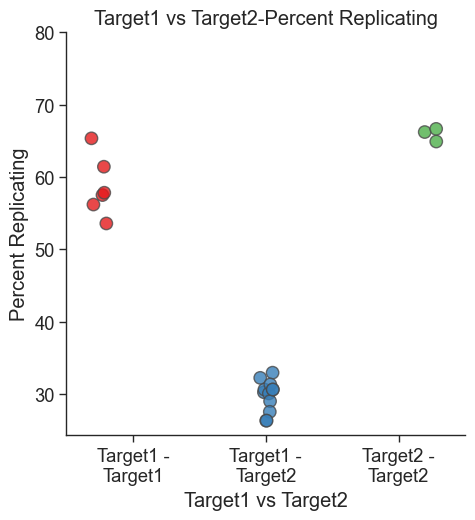

In [11]:
plot_simple_comparison(df=plate_to_plate_replicating_df,x=x,y=y,hue=x,
plotname=f"{x}-{y}-{hue}.png")

In [12]:
plate_to_plate_replicating_df.to_csv(f'checkpoint_csvs/{variable_to_save}-cross-plate-replication.csv',index=False)